<a href="https://colab.research.google.com/github/shullaw/maths/blob/main/statistics/Probability_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Measuring Distributions

In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./StudentsPerformance.csv')

df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
182,female,group E,high school,standard,none,50,50,47
106,female,group D,master's degree,standard,none,87,100,100
537,female,group D,high school,standard,none,51,66,62
111,male,group C,high school,standard,none,62,55,49
257,male,group C,associate's degree,standard,completed,78,77,77


In [5]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


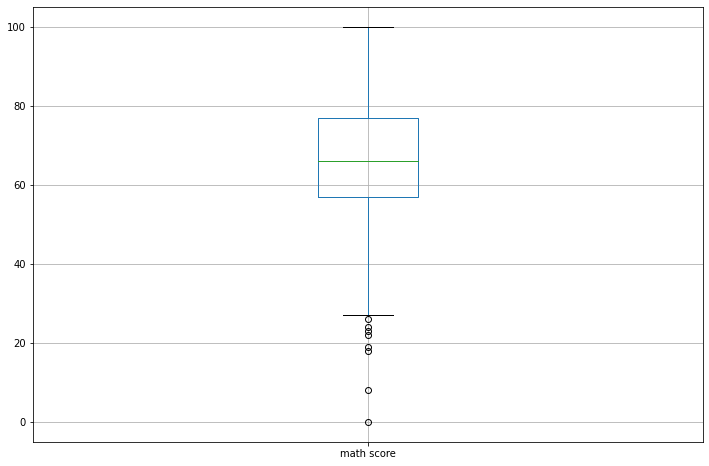

In [8]:
df.boxplot('math score', figsize=(12, 8))

plt.show()  # whiskers are 1.5*IQR from the median

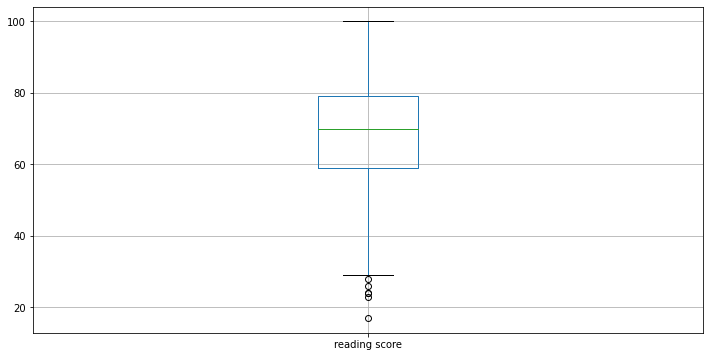

In [9]:
df.boxplot('reading score', figsize=(12,6))

plt.show()

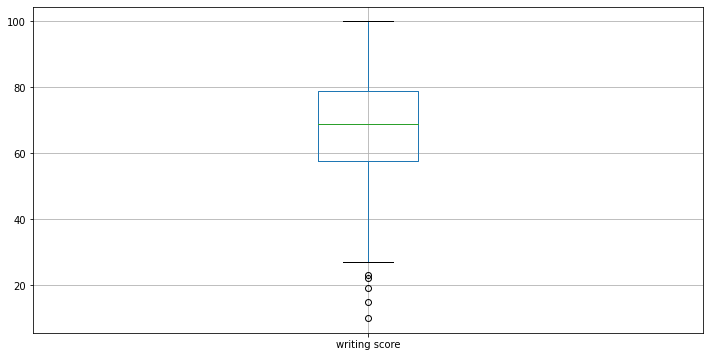

In [10]:
df.boxplot('writing score', figsize=(12,6))

plt.show()

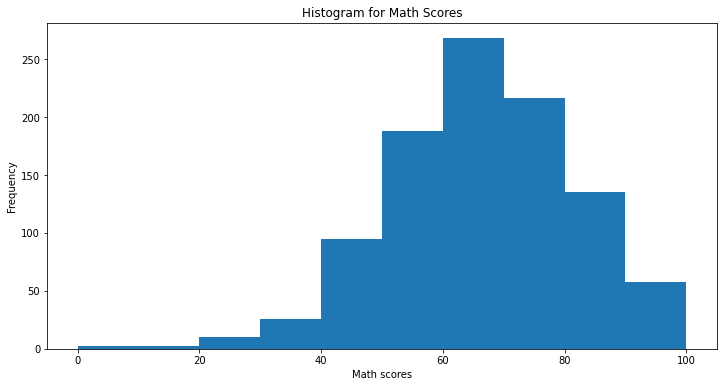

In [11]:
df['math score'].plot.hist(figsize=(12,6))

plt.xlabel('Math scores')

plt.title('Histogram for Math Scores')
plt.show()

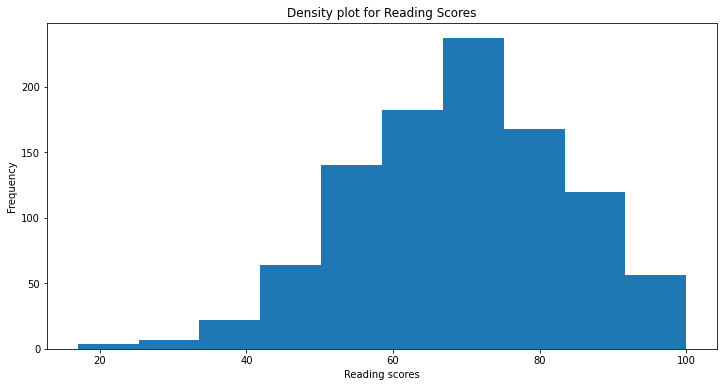

In [12]:
df['reading score'].plot.hist(figsize=(12,6))

plt.xlabel('Reading scores')

plt.title('Density plot for Reading Scores')
plt.show()

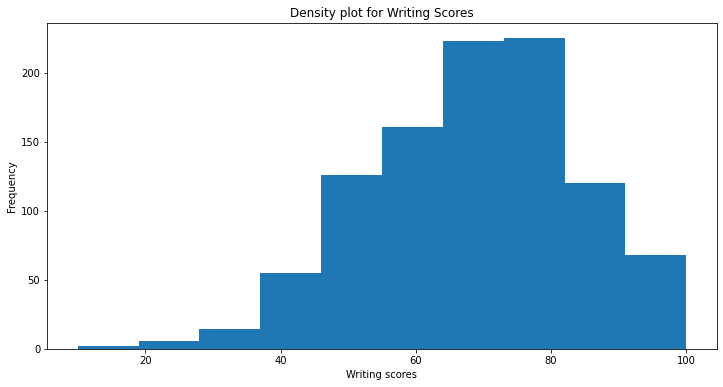

In [13]:
df['writing score'].plot.hist(figsize=(12,6))

plt.xlabel('Writing scores')

plt.title('Density plot for Writing Scores')
plt.show()

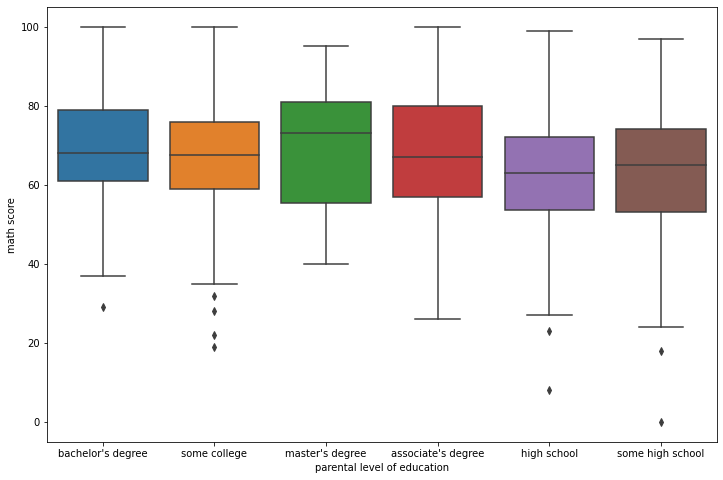

In [14]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='parental level of education', y='math score', data=df)

plt.show()

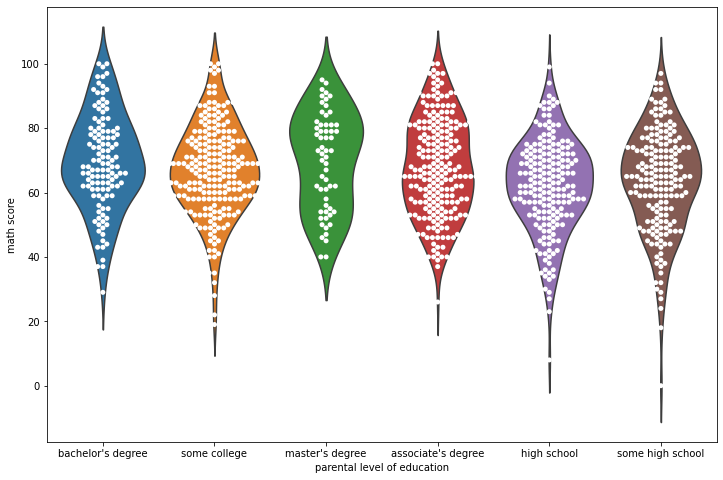

In [15]:
plt.figure(figsize=(12,8))

sns.violinplot(x='parental level of education',  # KDE (Kernel Density Estimation):
               y='math score',                   # estimation of probability distribution
               data=df,
               inner=None)
sns.swarmplot(x='parental level of education',
               y='math score',
               data=df,
               color='w')
plt.show()

## Calculating Confidence Intervals

In [17]:
edu_stats = df.groupby(['parental level of education'])['math score'].agg(['mean', 'count', 'std'])

edu_stats

,mean,count,std
parental level of education,,,
associate's degree,67.882883,222,15.112093
bachelor's degree,69.389831,118,14.943789
high school,62.137755,196,14.539651
master's degree,69.745763,59,15.153915
some college,67.128319,226,14.312897
some high school,63.497207,179,15.927989


In [20]:
ci90_high = []
ci90_low = []

In [21]:
for i in edu_stats.index:
  mean, count, std = edu_stats.loc[i]

  ci90_high.append(mean + 1.645 * (std / math.sqrt(count)))  # bounds of which population should appear
  ci90_low.append(mean - 1.645 * (std / math.sqrt(count)))   # with a 90% confidence interval

In [22]:
edu_stats['ci90_high'] = ci90_high
edu_stats['ci90_low'] = ci90_low

edu_stats

,mean,count,std,ci90_high,ci90_low
parental level of education,,,,,
associate's degree,67.882883,222,15.112093,69.551336,66.214430
bachelor's degree,69.389831,118,14.943789,71.652836,67.126825
high school,62.137755,196,14.539651,63.846164,60.429346
master's degree,69.745763,59,15.153915,72.991137,66.500389
some college,67.128319,226,14.312897,68.694490,65.562147
some high school,63.497207,179,15.927989,65.455602,61.538812


In [23]:
some_degree = df.loc[df['parental level of education'] == 'some college']

some_degree.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
662,female,group D,some college,free/reduced,none,55,71,69
462,female,group E,some college,standard,none,71,70,76
695,female,group D,some college,free/reduced,none,79,89,86
97,female,group E,some college,standard,completed,63,72,70
325,female,group C,some college,standard,none,82,90,94
555,female,group C,some college,free/reduced,none,32,39,33
1,female,group C,some college,standard,completed,69,90,88
469,male,group C,some college,standard,none,91,74,76
243,male,group E,some college,standard,none,59,51,43
139,male,group D,some college,standard,completed,71,61,69


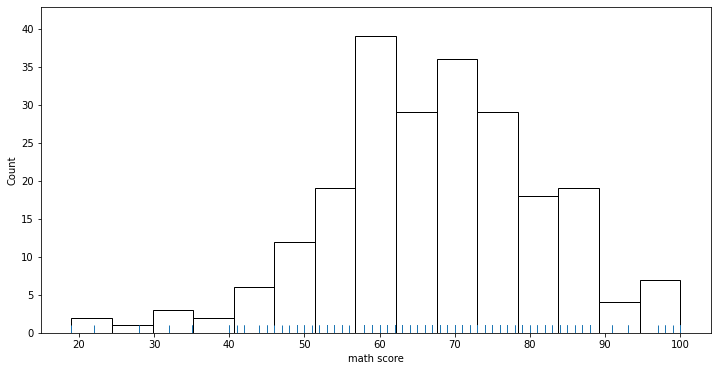

In [28]:
plt.figure(figsize=(12,6))

sns.histplot(some_degree['math score'], color='w')
sns.rugplot(some_degree['math score'])

plt.show()

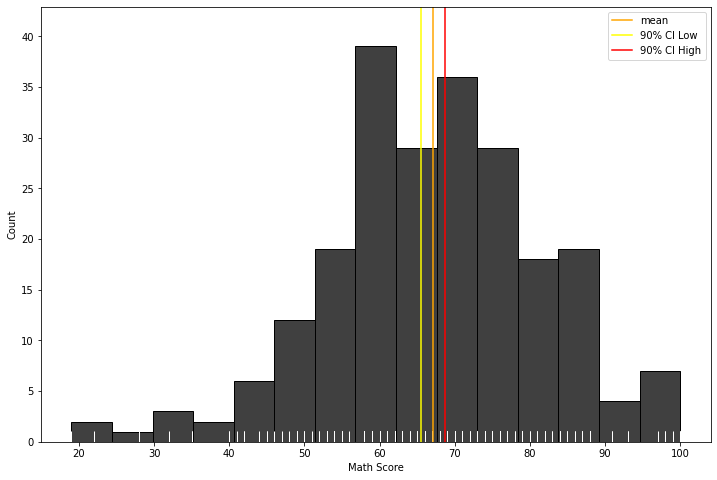

In [32]:
plt.figure(figsize=(12, 8))

sns.histplot(some_degree['math score'], color='black')
sns.rugplot(some_degree['math score'], color='w')

plt.axvline(x = edu_stats.loc['some college']['mean'], ymin=0,
            label = 'mean', color='orange')

plt.axvline(x = edu_stats.loc['some college']['ci90_low'], ymin=0,
            label = '90% CI Low', color='yellow')

plt.axvline(x = edu_stats.loc['some college']['ci90_high'], ymin=0,
            label = '90% CI High', color='red')

plt.xlabel('Math Score')
plt.legend()
plt.show()

$90\%$ of confidence intervals computed at the $95\%$ confidence level contain the mean

## Skewness and Kurtosis

In [33]:
from scipy import stats

In [36]:
df = pd.read_csv('./^NSEI.csv')

In [37]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-23,14768.549805,14878.599609,14707.000000,14814.750000,14814.750000,474200
1,2021-03-24,14712.450195,14752.349609,14535.000000,14549.400391,14549.400391,456400
2,2021-03-25,14570.900391,14575.599609,14264.400391,14324.900391,14324.900391,606800
3,2021-03-26,14506.299805,14572.900391,14414.250000,14507.299805,14507.299805,481000
4,2021-03-30,14628.500000,14876.299805,14617.599609,14845.099609,14845.099609,594500


In [39]:
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

In [40]:
df.head()

,Date,Adj Close
0,2021-03-23,14814.750000
1,2021-03-24,14549.400391
2,2021-03-25,14324.900391
3,2021-03-26,14507.299805
4,2021-03-30,14845.099609


In [41]:
df.dtypes

Date          object
Adj Close    float64
dtype: object

In [42]:
df['Date'] = pd.to_datetime(df['Date'])

In [43]:
df.dtypes

Date         datetime64[ns]
Adj Close           float64
dtype: object

In [44]:
df = df.sort_values(by='Date')
df.head(10)

,Date,Adj Close
0,2021-03-23,14814.750000
1,2021-03-24,14549.400391
2,2021-03-25,14324.900391
3,2021-03-26,14507.299805
4,2021-03-30,14845.099609
5,2021-03-31,14690.700195
6,2021-04-01,14867.349609
7,2021-04-05,14637.799805
8,2021-04-06,14683.500000
9,2021-04-07,14819.049805


In [45]:
df.describe()

,Adj Close
count,248.000000
mean,16597.605410
std,1149.275240
min,14296.400391
25%,15739.512207
50%,16921.650390
75%,17533.100586
max,18477.050781


In [46]:
df.shape

(248, 2)

Text(0.5, 1.0, 'Nifty 50 Data')

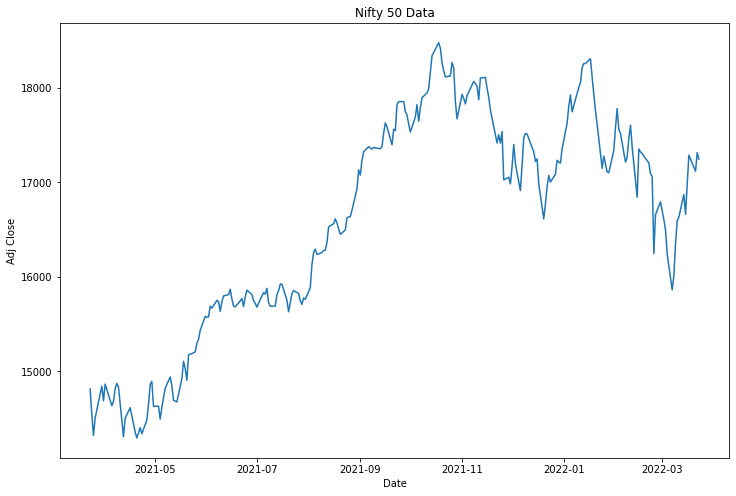

In [47]:
plt.figure(figsize=(12, 8))

sns.lineplot(x = 'Date', y = 'Adj Close', data=df)

plt.title('Nifty 50 Data')

In [49]:
df['Returns'] = df['Adj Close'].pct_change()

df.head(10)

,Date,Adj Close,Returns
0,2021-03-23,14814.750000,NaN
1,2021-03-24,14549.400391,-0.017911
2,2021-03-25,14324.900391,-0.015430
3,2021-03-26,14507.299805,0.012733
4,2021-03-30,14845.099609,0.023285
5,2021-03-31,14690.700195,-0.010401
6,2021-04-01,14867.349609,0.012025
7,2021-04-05,14637.799805,-0.015440
8,2021-04-06,14683.500000,0.003122
9,2021-04-07,14819.049805,0.009231


In [50]:
df.dropna(inplace=True)

In [51]:
df.count()

Date         247
Adj Close    247
Returns      247
dtype: int64

Text(0.5, 1.0, 'Nifty 50 Data Returns')

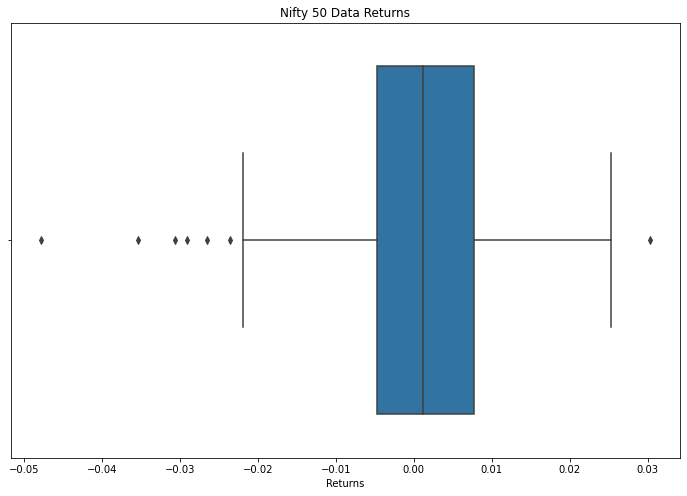

In [52]:
plt.figure(figsize=(12, 8))

sns.boxplot(x = df['Returns'])

plt.title('Nifty 50 Data Returns')

In [57]:
stats.skew(df['Returns']) # compared to 0 (positive and negative)

-0.7814748113801802

In [58]:
stats.kurtosis(df['Returns'])  # compared to 3 (larger than 3 means more outliers)

2.3768644997046016